###Install Packages

In [ ]:
import numpy as np
!pip install scikit-learn==1.3.0
import os
import matplotlib.pyplot as plt
from pathlib import *
import seaborn as sns

!pip install tensorflow==2.15.0
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
!pip install tensorflow-addons --upgrade
from tensorflow.keras import layers, models
import tensorflow_addons as tfa
from tensorflow.keras.optimizers.legacy import Adam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 21.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442

/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


###Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


###Constants

In [ ]:
# DIRECTORIES
CURRENT_PATH = "/content/drive/My Drive/max_sinus6"

# DATASET_PATH = "dataset"
DATASET_PATH = "/content/drive/My Drive/max_sinus6"

# Dataset paths
DATASET_PATH = CURRENT_PATH
DATASET_TRAIN = f"{DATASET_PATH}/train"
DATASET_VAL = f"{DATASET_PATH}/val"
DATASET_TEST = f"{DATASET_PATH}/test"

print("Train Path:", DATASET_TRAIN)
print("Validation Path:", DATASET_VAL)
print("Test Path:", DATASET_TEST)


# Directory structure for Train, Validation and Test dataset
DIR_NAMES = {
    "clear": "clear",
    "opaque": "opaque",
    "thick": "thick"
}

# Number of Classes
NUM_CLASSES = 3

# Classes
CLASSES = {
    "clear":0,
    "opaque":1,
    "thick":2
}
BALANCE_DATASET = False
SHUFFLE_DATASET = False

# IMAGE CONFIG
CHANNELS = 3
IMG_SIZE = (200, 200)
INPUT_SHAPE = (IMG_SIZE[0], IMG_SIZE[0], CHANNELS)

# HYPERPARAMETERS (CNN)
BATCH_SIZE = 32
NUM_EPOCHS = 200
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001

Train Path: /content/drive/My Drive/max_sinus6/train
Validation Path: /content/drive/My Drive/max_sinus6/val
Test Path: /content/drive/My Drive/max_sinus6/test


###Paths

In [ ]:
TRAIN_PATHS = list()
VAL_PATHS = list()
TEST_PATHS = list()
PATHS_CLASS = list()

In [ ]:
for class_name, name in DIR_NAMES.items():
    TRAIN_PATHS.append(os.path.join(CURRENT_PATH, DATASET_PATH, DATASET_TRAIN, name))
    VAL_PATHS.append(os.path.join(CURRENT_PATH, DATASET_PATH, DATASET_VAL, name))
    TEST_PATHS.append(os.path.join(CURRENT_PATH, DATASET_PATH, DATASET_TEST, name))
    PATHS_CLASS.append(class_name)

###Array of filenames along with absolute path

In [ ]:
# train dataset
x_train_temp = list()
x_train = list()
y_train = list()

# validation dataset
x_val_temp = list()
x_val = list()
y_val = list()

# test dataset
x_test_temp = list()
x_test = list()
y_test = list()

In [ ]:
for class_name, name in DIR_NAMES.items():
    index = PATHS_CLASS.index(class_name)
    class_id = CLASSES[class_name]

    train_filenames = [os.path.join(TRAIN_PATHS[index], filename) for filename in os.listdir(TRAIN_PATHS[index])]
    x_train_temp.append(train_filenames)

    val_filenames = [os.path.join(VAL_PATHS[index], filename) for filename in os.listdir(VAL_PATHS[index])]
    x_val_temp.append(val_filenames)

    test_filenames = [os.path.join(TEST_PATHS[index], filename) for filename in os.listdir(TEST_PATHS[index])]
    x_test_temp.append(test_filenames)

###Image count & classes

In [ ]:
print("CLASS\tTRAIN\tVAL\tTEST")
for i in range(NUM_CLASSES):
    print(f"{PATHS_CLASS[i]}\t{len(x_train_temp[i])}\t{len(x_val_temp[i])}\t{len(x_test_temp[i])}")

CLASS	TRAIN	VAL	TEST
clear	275	55	36
opaque	275	55	36
thick	275	55	36


###Function to map class names to numerical identifiers

In [ ]:
def get_y(class_name):
    return CLASSES[class_name]

In [ ]:
def get_class_from_index(index: int):
    for class_name, value in CLASSES.items():
        if value == index:
            return class_name

In [ ]:
get_class_from_index(0), get_class_from_index(1), get_class_from_index(2)

('clear', 'opaque', 'thick')

###Open one image

In [ ]:
def preprocess_image(filename):
    image_str = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_str, channels=CHANNELS)
    image = tf.image.resize(image, IMG_SIZE)
    return image

In [ ]:
def get_image(filename):
    img = preprocess_image(filename)
    return tf.keras.preprocessing.image.array_to_img(img)

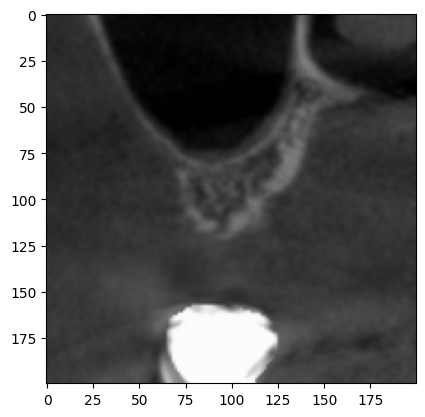

In [ ]:
t_name = x_train_temp[0][1]
img = preprocess_image(t_name)
plt.imshow(tf.keras.preprocessing.image.array_to_img(img))

###Initialize arrays for training, validation, and testing datasets

In [ ]:
# train
x_train = np.array([])
y_train = np.array([])

# val
x_val = np.array([])
y_val = np.array([])

# test
x_test = np.array([])
y_test = np.array([])

###Create input and output

In [ ]:
def concat_dataset(arr, dataset, init):
    if init:
        arr = np.array([ preprocess_image(filename) for filename in dataset ])
        arr = arr/255.0
    else:
        temp = np.array( [preprocess_image(filename) for filename in dataset] )
        temp = temp/255.0
        arr = np.concatenate( ( arr,  temp) )
    return arr

In [ ]:
for i in range(len(x_train_temp)):
    class_name = PATHS_CLASS[i]
    y = get_y(class_name)

    # train
    train_total = len(x_train_temp[i])
    print(train_total, y)
    y_train = np.concatenate( ( y_train, np.full((train_total), y) ) )
    x_train = concat_dataset(x_train, x_train_temp[i], i == 0)

    # val
    val_total = len(x_val_temp[i])
    y_val = np.concatenate( ( y_val, np.full((val_total), y) ) )
    x_val = concat_dataset(x_val, x_val_temp[i], i == 0)

    # test
    test_total = len(x_test_temp[i])
    y_test = np.concatenate( ( y_test, np.full((test_total), y) ) )
    x_test = concat_dataset(x_test, x_test_temp[i], i == 0)

275 0
275 1
275 2


In [ ]:
len(x_train), len(x_val), len(x_test)

(825, 165, 108)

###Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(*IMG_SIZE),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation"
)

In [ ]:
data_augmentation.layers[0].adapt(x_train)

In [ ]:
len(x_train_temp[1]), len(x_train[10:]), len(y_train)

(275, 815, 825)

###CNN Classifier

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [ ]:
lr_schedule = ExponentialDecay(
    LEARNING_RATE,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)

In [ ]:
cnn_model = Sequential()
cnn_model.add(data_augmentation)
cnn_model.add(Conv2D(32, (2, 2), input_shape=[INPUT_SHAPE[0], INPUT_SHAPE[1], INPUT_SHAPE[2]]))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(32, (2, 2)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(64, (2, 2)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.4))
cnn_model.add(Conv2D(32, (2, 2)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(NUM_CLASSES))

cnn_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=lr_schedule),
    metrics=['accuracy' ]
        )

###Load saved CNN model

In [ ]:
cnn_model_weights = "/content/drive/MyDrive/cnn_model_sinusnew2.weights.h5"

In [ ]:
cnn_model.load_weights(cnn_model_weights)

###Model Summary

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequent  (None, 200, 200, 3)       7         
 ial)                                                            
                                                                 
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 activation (Activation)     (None, 199, 199, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        4128      
                                                                 
 activation_1 (Activation)   (None, 98, 98, 32)        0

###Training

In [ ]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    epochs=150,
    verbose=2
)

###Uncertainty Estimation

In [ ]:
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

from scipy.special import softmax

import matplotlib.cm as cm

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from scipy.stats import entropy
from tensorflow.image import resize

###Section 1

###1. Calculation of mean and variance

In [ ]:
class_labels = ['clear', 'opaque', 'thick']
def predict_with_uncertainty(model, x, n_iter=100):
    predictions = np.zeros((n_iter, x.shape[0], NUM_CLASSES))

    for i in range(n_iter):
        predictions[i] = model(x, training=True).numpy()

    prediction_mean = np.mean(predictions, axis=0)
    prediction_variance = np.var(predictions, axis=0)

    return prediction_mean, prediction_variance

In [ ]:
# With test dataset
mean_predictions, prediction_variance = predict_with_uncertainty(cnn_model, x_test, n_iter=100)

for i in range(len(x_test)):
    print(f"Sample {i}:")
    print(f"Mean prediction: {mean_predictions[i]}")
    print(f"Prediction variance (epistemic uncertainty): {prediction_variance[i]}")

Sample 0:
Mean prediction: [ 27.89120578 -27.33462111   6.50609793]
Prediction variance (epistemic uncertainty): [37.29592655 39.52551018 50.66425467]
Sample 1:
Mean prediction: [ 32.81585088 -39.3991955    9.45131815]
Prediction variance (epistemic uncertainty): [66.09098624 64.54105726 71.75114167]
Sample 2:
Mean prediction: [ 29.98026401 -30.45871546   9.94645329]
Prediction variance (epistemic uncertainty): [41.1899141  44.26542355 43.57909858]
Sample 3:
Mean prediction: [ 31.0631538  -35.14080114  13.18169484]
Prediction variance (epistemic uncertainty): [62.13556206 65.13671262 63.21939107]
Sample 4:
Mean prediction: [ 27.09617171 -31.89625003   3.63435447]
Prediction variance (epistemic uncertainty): [25.31966542 44.75851154 29.916349  ]
Sample 5:
Mean prediction: [ 31.97102176 -34.00681376   5.06508197]
Prediction variance (epistemic uncertainty): [42.85143317 61.06747476 43.9587207 ]
Sample 6:
Mean prediction: [ 26.91261919 -28.58226477  13.60124189]
Prediction variance (epist

###2. Conversion to probabilities

In [ ]:
mean_predictions = np.array([
  [ 27.89120578, -27.33462111, 6.50609793],
  [ 32.81585088, -39.3991955, 9.45131815],
  [ 29.98026401, -30.45871546, 9.94645329],
  [ 31.0631538, -35.14080114, 13.18169484],
  [ 27.09617171, -31.89625003, 3.63435447],
  [ 31.97102176, -34.00681376, 5.06508197],
  [ 26.91261919, -28.58226477, 13.60124189],
  [ 25.17571002, -27.65974536, 15.48208005],
  [ 37.68865023, -41.09961232, 9.23095641],
  [ 29.38335211, -32.21053349, 15.34382675],
  [ 18.33048007, -19.76997493, 10.42149806],
  [ 29.3690628, -27.27469568, 7.61879476],
  [ 36.0679645, -37.01504221, 10.46262061],
  [ 25.45239048, -28.97123441, 12.34684792],
  [ 27.14523246, -31.17505631, 12.35848576],
  [ 31.92618194, -33.82097845, 9.3865044, ],
  [ 26.53109709, -27.63274953, 9.96056843],
  [ 21.36345249, -22.8924309, 11.26643037],
  [ 28.91835994, -33.77123669, 8.72328112],
  [ 26.30383142, -29.75305862, 9.68029266],
  [ 27.04043677, -27.82394931, 5.85292717],
  [ 26.35364397, -28.63670079, 10.94193512],
  [ 35.15262379, -33.39638954, 12.05798853],
  [ 28.83310908, -31.26896766, 13.16485924],
  [ 19.93664909, -21.61531476, 20.25159356],
  [ 18.89427461, -21.75904812, 12.52142792],
  [ 17.19334891, -21.72287003, 17.22955457],
  [ 23.55789181, -25.63035214, 11.71118283],
  [ 25.29617806, -27.80541467, 9.24310612],
  [ 34.24316527, -37.49327301, 11.28331314],
  [ 30.85096428, -31.84368912, 6.37537809],
  [ 28.51871441, -32.98383531, 7.10978898],
  [ 22.87332612, -22.65691193, 10.04009645],
  [ 29.50917033, -29.30726287, 7.32930618],
  [ 27.26404242, -28.74797793, 15.41060634],
  [ 24.53590591, -24.50359627, 9.55868366],
  [-8.07180884, 13.45226957, -4.67782825],
  [-8.39370268, 11.51632331, 5.17000984],
  [-10.91513262, 16.60996037, 3.23994655],
  [-13.98472216, 23.85260525, 2.47883704],
  [-16.2164388, 17.59514678, 0.24945528],
  [-16.73191853, 17.83024636, -0.22746214],
  [-15.63768081, 18.3724544, 3.23469979],
  [-16.0791395, 19.16558692, 3.74971762],
  [-22.10477942, 26.07446771, 1.58460158],
  [-13.57976396, 14.22272702, 1.09421852],
  [-11.48564409, 11.92096572, 2.30813732],
  [-12.76610631, 13.18477401, 2.97765498],
  [-16.20833117, 20.62612231, 2.64364403],
  [-19.77796112, 22.3413544, -1.79630257],
  [-12.47298685, 17.08549244, 1.07800906],
  [-15.48381049, 19.92492184, 3.0564773, ],
  [-16.77018552, 17.4114725, 5.68582821],
  [-15.63807947, 17.2098653, 4.31037443],
  [-8.20632098, 12.49981149, -1.47308178],
  [-18.63561103, 20.7199068, 5.68473031],
  [-4.20340599, 8.83479198, 14.37441761],
  [-11.64529008, 24.62708997, 1.60533088],
  [-17.10462001, 20.43640146, 7.06277633],
  [-14.93133217, 18.45714158, 8.43102787],
  [-24.81959041, 28.59968631, 5.54718477],
  [-11.47641737, 16.45079, 5.66899039],
  [-11.59643055, 18.36157749, 2.6578197, ],
  [-15.44919054, 20.91746037, 7.70704303],
  [-18.676285, 20.37113508, 2.17222272],
  [-17.01859672, 18.78312621, 4.70771355],
  [-18.25493718, 20.39747783, 3.91597798],
  [-17.79800609, 19.23622405, 3.48998777],
  [-13.78384736, 15.62218992, 3.53139879],
  [-24.69503979, 30.07182725, 8.08169348],
  [-22.97514375, 25.47596087, 3.89463585],
  [-19.57007968, 23.5758393, 7.64718023],
  [ 2.45454391, 0.62253602, 22.78139067],
  [ 2.24666409, -2.11777033, 27.87092184],
  [-2.18557892, 4.35119725, 11.91702379],
  [-2.2328736, 5.33146613, 22.21430347],
  [ 3.37615445, -3.05173107, 19.92559848],
  [ 12.11187482, -12.53012954, 14.21479277],
  [-6.14108776, 13.82918003, 23.41629299],
  [-2.78250649, 6.56714368, 28.15456285],
  [ 2.4277835, 2.27386112, 25.75550975],
  [-2.9915167, 4.86247998, 32.6163812, ],
  [-4.50067182, 6.00351933, 20.95250029],
  [-0.10829872, -0.06418818, 20.68089069],
  [-3.52981772, 4.69918671, 15.94747825],
  [ 0.37541691, 3.59641907, 28.26998312],
  [ 5.91622204, -4.7820327, 24.80051381],
  [-2.02173404, 6.39895772, 23.99666272],
  [-5.95131969, 8.49710299, 26.81712744],
  [-6.70590021, 12.07999215, 19.56248368],
  [ 14.8722442, -17.33402396, 17.98065886],
  [-7.48951993, 11.94431862, 23.79652612],
  [ 3.00154277, 1.27799502, 14.71631601],
  [ 4.54595391, -0.51536204, 11.90014789],
  [ 2.50221044, -1.63096662, 31.90310204],
  [12.56048375, -4.7277029, 25.2510925, ],
  [-2.93602737, 4.20440535, 26.66589522],
  [ 2.05434811, -0.94514603, 20.77051833],
  [ 12.85451717, -10.82973417, 21.59119017],
  [ 6.22090743, -2.45473322, 30.22347319],
  [10.7740921, -8.54817356, 25.1000175, ],
  [-0.24942358, 6.79346336, 39.76858414],
  [ 3.36173615, -0.03589882, 30.9697303, ],
  [ 4.50942387, -3.0907107, 31.18868411],
  [ 3.02031849, 2.10102673, 17.67869033],
  [ 7.03577146, -3.30833755, 19.56107815],
  [ 7.50776724, -6.32648941, 20.54856402],
  [ 11.92958532, -11.70519007, 19.42542486],
])

In [ ]:
probabilities = tf.nn.softmax(mean_predictions, axis=1).numpy()

for i, prob in enumerate(probabilities):
    print(f"Sample {i}:")
    print(f"Logits: {mean_predictions[i]}")
    print(f"Probabilities: {prob}")

Sample 0:
Logits: [ 27.89120578 -27.33462111   6.50609793]
Probabilities: [9.99999999e-01 1.03687911e-24 5.15900164e-10]
Sample 1:
Logits: [ 32.81585088 -39.3991955    9.45131815]
Probabilities: [1.00000000e+00 4.33914184e-32 7.12709197e-11]
Sample 2:
Logits: [ 29.98026401 -30.45871546   9.94645329]
Probabilities: [9.99999998e-01 5.64527007e-27 1.99262948e-09]
Sample 3:
Logits: [ 31.0631538  -35.14080114  13.18169484]
Probabilities: [9.99999983e-01 1.77005875e-29 1.71467193e-08]
Sample 4:
Logits: [ 27.09617171 -31.89625003   3.63435447]
Probabilities: [1.00000000e+00 2.39837321e-26 6.46639511e-11]
Sample 5:
Logits: [ 31.97102176 -34.00681376   5.06508197]
Probabilities: [1.00000000e+00 2.21916761e-29 2.06489902e-12]
Sample 6:
Logits: [ 26.91261919 -28.58226477  13.60124189]
Probabilities: [9.99998344e-01 7.92277647e-25 1.65554722e-06]
Sample 7:
Logits: [ 25.17571002 -27.65974536  15.48208005]
Probabilities: [9.99938329e-01 1.13194805e-23 6.16713152e-05]
Sample 8:
Logits: [ 37.68865023 

###3. Plotting of uncertainty

In [ ]:
prediction_variance = np.array([
  [37.29592655, 39.52551018, 50.66425467],
  [66.09098624, 64.54105726, 71.75114167],
  [41.1899141, 44.26542355, 43.57909858],
  [62.13556206, 65.13671262, 63.21939107],
  [25.31966542, 44.75851154, 29.916349, ],
  [42.85143317, 61.06747476, 43.9587207, ],
  [77.36561579, 85.32719681, 64.89324085],
  [37.8053555, 43.91910433, 43.09039122],
  [71.74904038, 83.52557311, 73.24622792],
  [58.47600367, 85.44427655, 54.56712589],
  [39.20203794, 34.26209783, 32.99688385],
  [35.29158021, 32.41997941, 28.02850637],
  [48.33670786, 63.73469124, 60.12448329],
  [39.9332436, 41.05616551, 43.48382325],
  [63.91182906, 57.8742059, 66.96279446],
  [59.16983777, 54.1814971, 51.61121335],
  [52.95526941, 56.42550404, 53.37191377],
  [36.1813053, 57.07114577, 37.43612245],
  [65.86616141, 62.48915917, 57.54762357],
  [39.11690811, 42.36563543, 38.97710516],
  [53.74988525, 58.65533761, 56.34152125],
  [45.25332084, 44.14287367, 46.34532428],
  [59.82203038, 62.76540728, 51.7853266, ],
  [44.84944423, 64.20690537, 58.70453226],
  [41.15820506, 54.64147611, 58.86657112],
  [32.94239019, 46.4773998, 43.63807889],
  [48.54468351, 61.30303263, 72.82263091],
  [39.23139468, 31.45139239, 53.0932802, ],
  [60.90747765, 69.33881716, 51.32585329],
  [64.91379065, 76.18823499, 65.95762532],
  [47.39226904, 44.53911832, 44.21990613],
  [48.15681912, 60.17237027, 47.02099933],
  [49.88612634, 60.16391809, 49.05878865],
  [47.15430698, 55.6751207, 43.72107383],
  [32.5436595, 36.6732747, 35.45150003],
  [36.46591905, 41.598496, 44.04286069],
  [ 9.23442514, 10.44462555, 7.6241028, ],
  [8.43786139, 8.14620416, 7.93556535],
  [18.92612755, 20.12712954, 19.06034943],
  [26.25348163, 28.2786947, 20.80133723],
  [23.96202317, 17.18501941, 9.86560593],
  [23.8951531, 15.84346049, 5.99267571],
  [14.78054308, 11.37362811, 6.21157295],
  [18.03991324, 20.43509231, 5.77931971],
  [35.87369941, 32.65071962, 16.83343099],
  [18.16839279, 7.55262651, 7.69251756],
  [12.30108597, 11.61240509, 5.40575907],
  [16.41905646, 14.82426212, 7.80494856],
  [23.68547497, 23.93290426, 12.42746574],
  [31.95322368, 22.68434648, 10.52275107],
  [19.48256816, 14.24050327, 11.0355795, ],
  [21.42556396, 17.45010735, 11.80175172],
  [17.60854719, 16.19287328, 9.82509955],
  [19.27384002, 12.43981174, 7.78387265],
  [15.86478994, 19.49562712, 10.68362822],
  [35.2955183, 32.53389262, 16.31506816],
  [ 8.22581289, 24.93026026, 25.42735414],
  [32.15113004, 43.82620235, 13.52882821],
  [24.59774372, 29.1559815, 10.22795739],
  [15.39171746, 21.05860194, 16.31337312],
  [51.12516135, 48.30269532, 16.32464139],
  [10.28766791, 12.37143157, 9.54063991],
  [16.56659413, 19.9744531, 6.03505203],
  [32.50376565, 25.2667991, 22.53554413],
  [29.22245063, 21.61699074, 8.76065546],
  [24.13238453, 25.91106204, 7.26520374],
  [39.49265335, 29.01446047, 12.05318863],
  [31.23620604, 26.68919458, 12.79834041],
  [34.82828839, 26.42512478, 23.58029313],
  [31.13998949, 40.11163008, 19.46370666],
  [37.98255639, 34.23523042, 11.29774197],
  [28.64498027, 20.09664767, 14.27754916],
  [16.89963863, 40.23225144, 26.04678118],
  [19.61035395, 37.26386108, 39.19364961],
  [14.0717324, 16.6435379, 13.20891057],
  [23.32231208, 43.68140269, 48.06389534],
  [18.07369932, 24.2666933, 19.56392072],
  [23.76323692, 23.08271364, 23.44868258],
  [ 22.66620436, 46.47189899, 111.68576637],
  [19.07520402, 34.11390903, 38.53092114],
  [35.66291111, 63.29734841, 26.67736072],
  [25.8155869, 65.24724132, 87.60632178],
  [17.54425768, 26.40286368, 35.64187372],
  [24.60722559, 28.11016167, 20.96959471],
  [12.11352193, 18.02959919, 28.34673596],
  [23.20604721, 35.79156177, 37.14640253],
  [31.969005, 33.36539937, 36.79007157],
  [16.27768755, 29.39434847, 42.65272436],
  [20.13025736, 57.03521056, 92.40448149],
  [21.5700763, 24.21350801, 45.81540922],
  [18.24801786, 25.93043193, 20.90113204],
  [29.10865012, 44.68773684, 55.500508, ],
  [20.65901899, 37.75040251, 17.25068792],
  [11.43318507, 13.07947279, 17.65757513],
  [33.73465907, 62.82489598, 58.07358213],
  [25.30152212, 40.22596412, 39.81217114],
  [21.8949946, 41.32492581, 37.83891122],
  [13.99120295, 21.68181288, 27.54598064],
  [31.08239011, 33.10613546, 30.31781341],
  [29.43474178, 42.80516454, 34.7501561, ],
  [35.38817746, 38.32374527, 30.21513916],
  [42.00877968, 84.02969902, 83.38308768],
  [29.79811615, 52.46096296, 49.83781318],
  [32.85115404, 56.67205859, 91.05282197],
  [17.34735891, 16.83480994, 24.44762846],
  [18.1531524, 21.45098293, 20.70090927],
  [21.19850985, 24.38490597, 32.71319554],
  [33.08960319, 35.44580551, 33.80490931],
])

In [ ]:
def plot_uncertainty(mean_predictions, prediction_variance, sample_index):
    probabilities = tf.nn.softmax(mean_predictions).numpy()

    plt.figure(figsize=(4, 2))
    plt.bar(range(len(probabilities)), probabilities, yerr=prediction_variance, capsize=5, alpha=0.7, color='b')
    plt.xticks(range(len(probabilities)), class_labels)
    plt.title(f'Sample {sample_index} Predictions and Uncertainty')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.show()

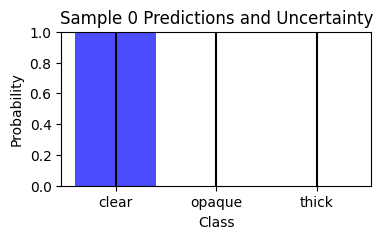

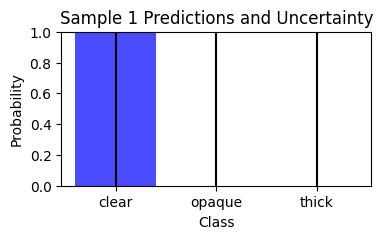

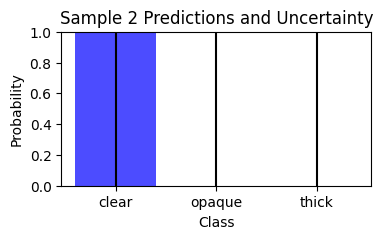

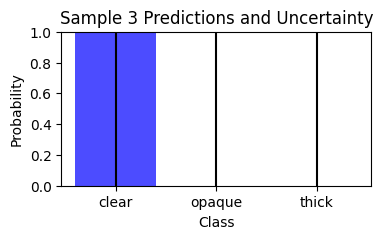

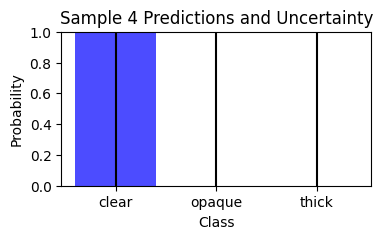

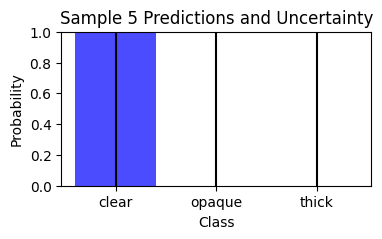

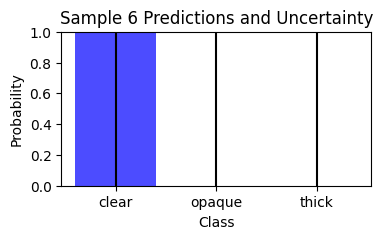

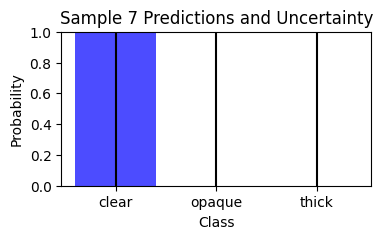

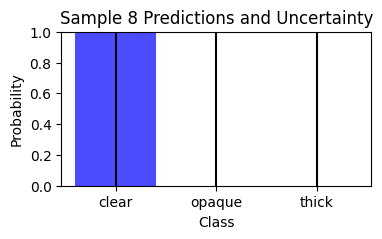

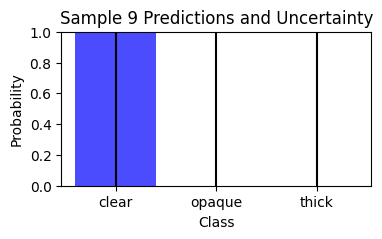

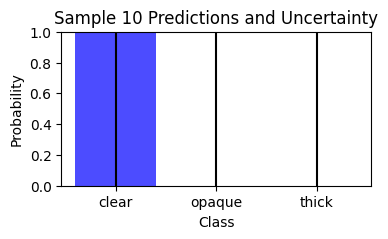

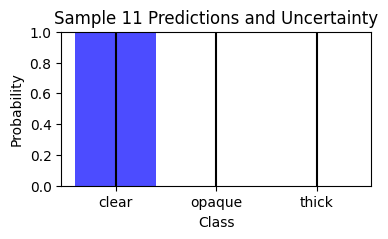

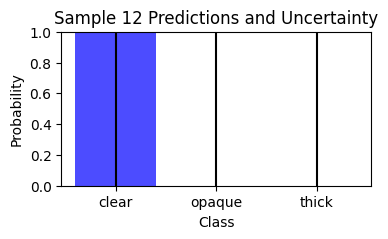

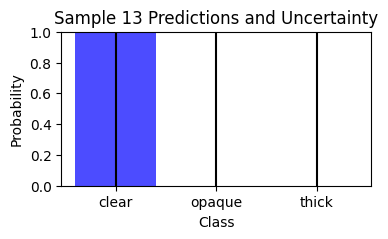

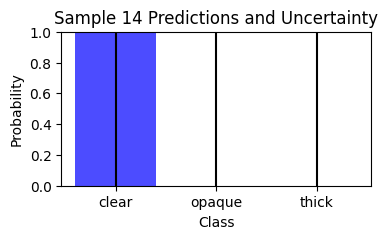

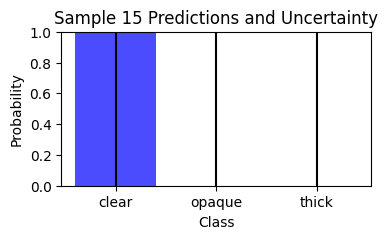

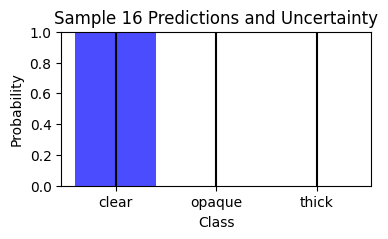

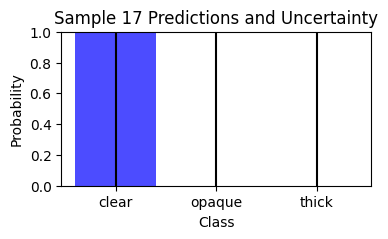

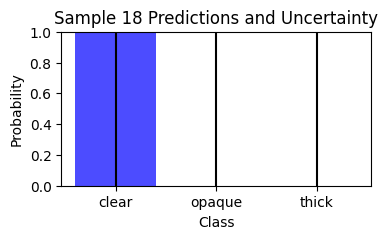

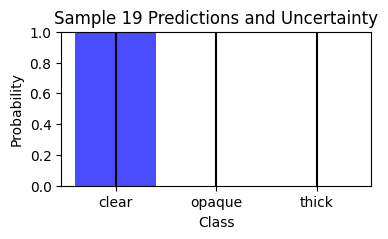

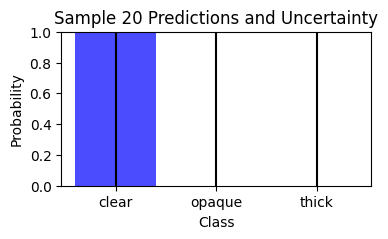

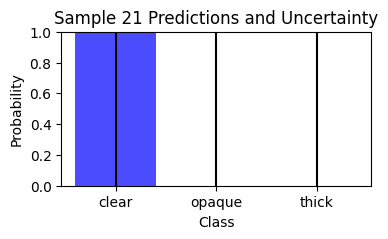

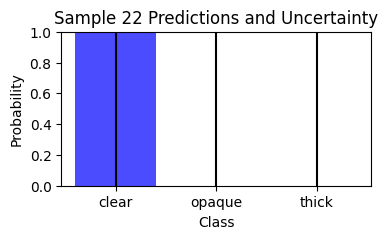

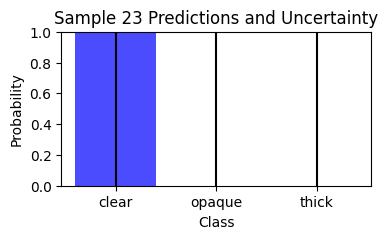

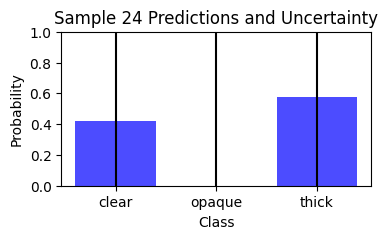

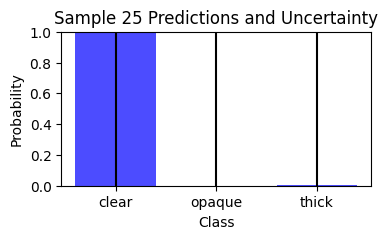

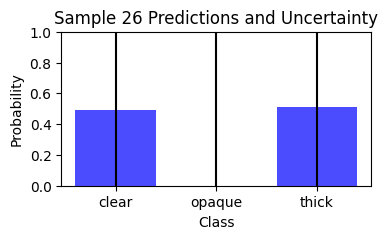

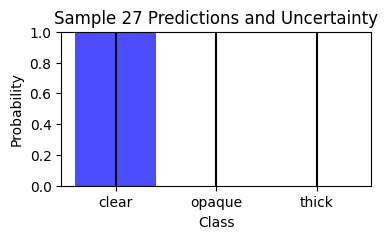

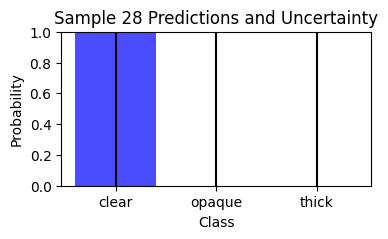

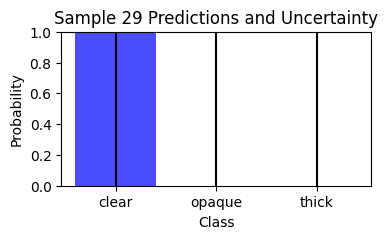

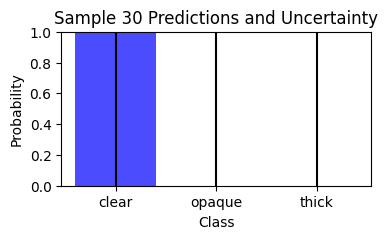

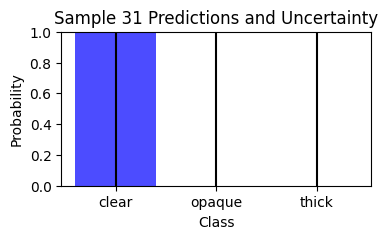

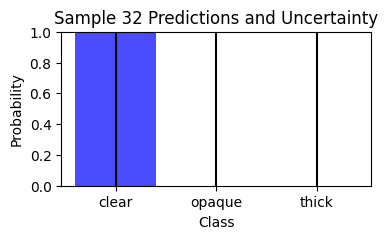

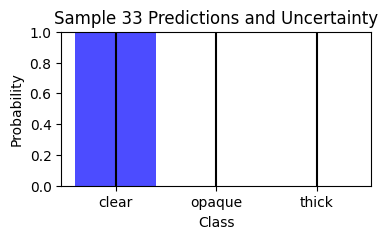

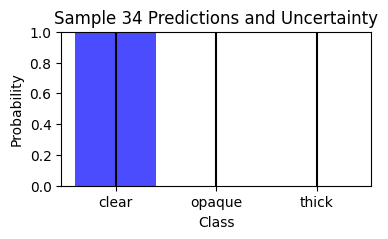

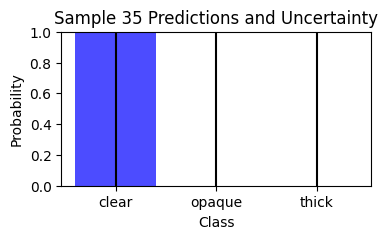

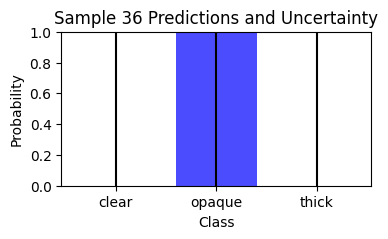

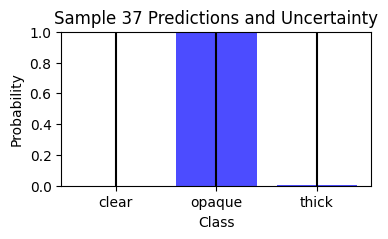

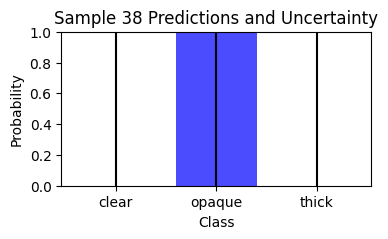

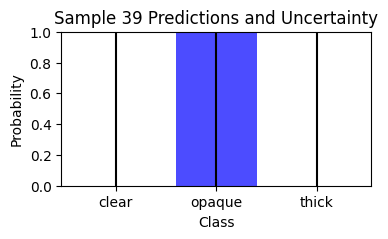

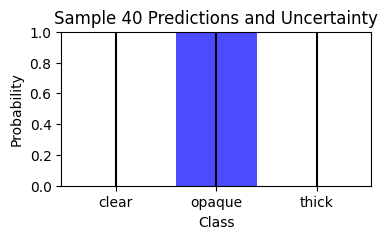

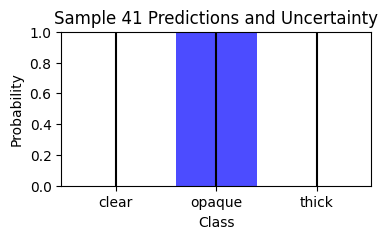

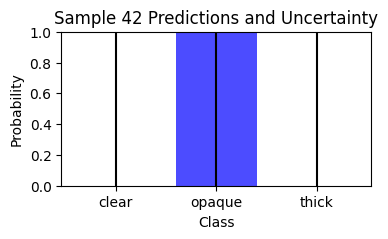

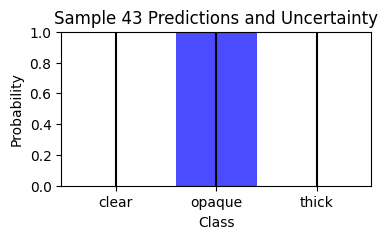

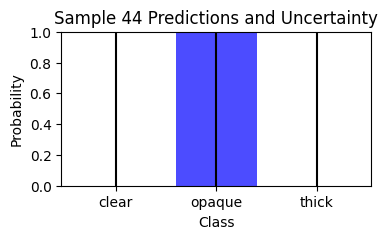

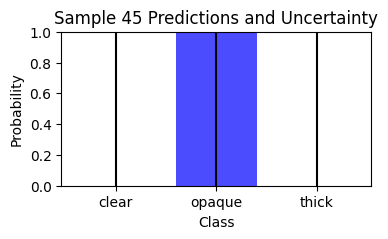

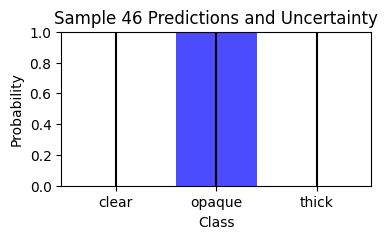

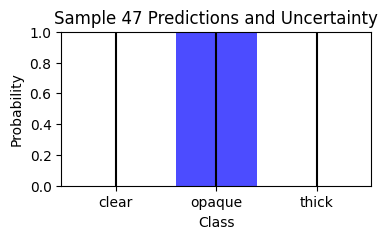

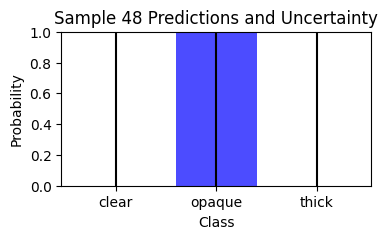

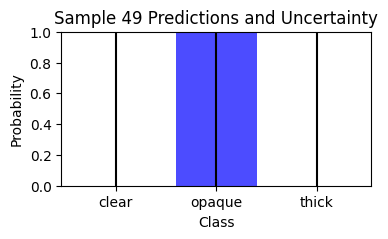

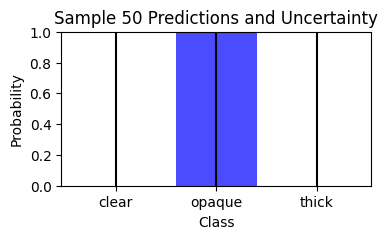

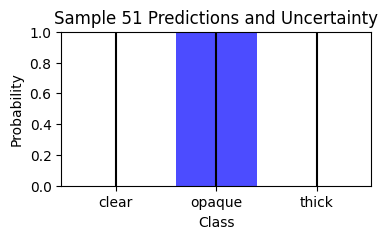

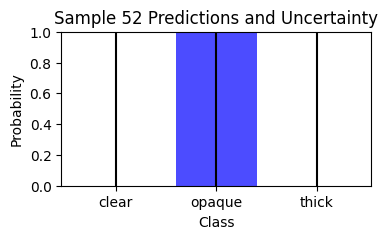

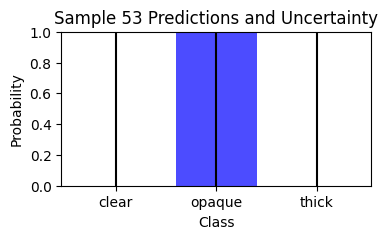

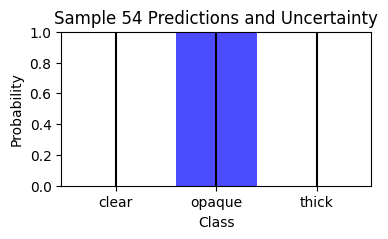

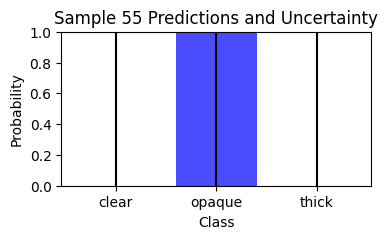

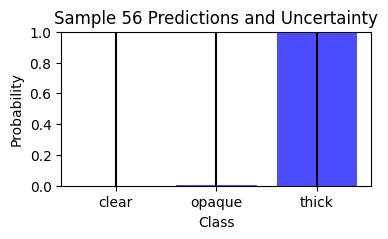

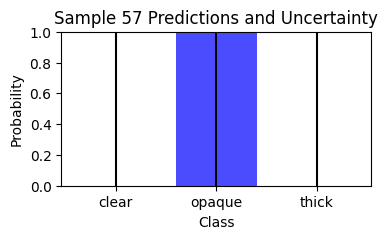

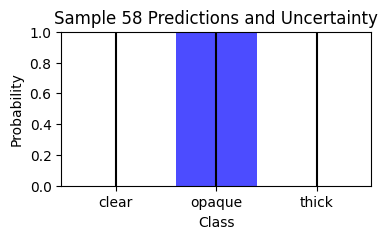

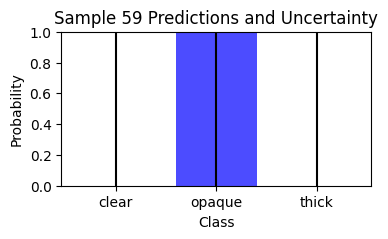

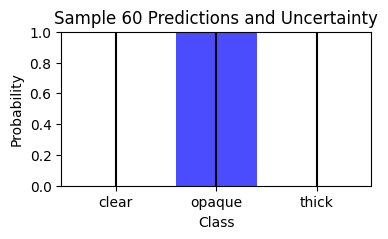

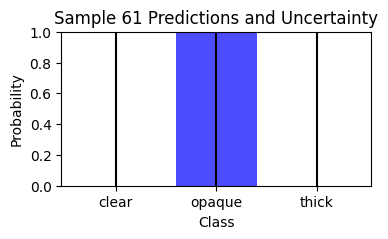

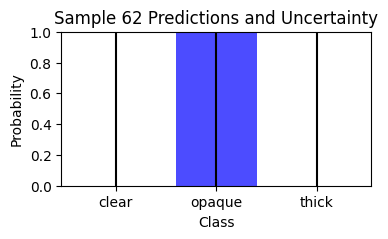

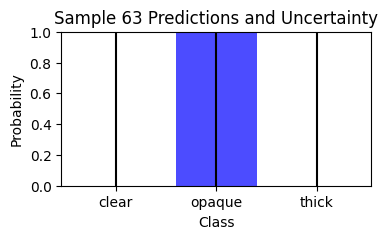

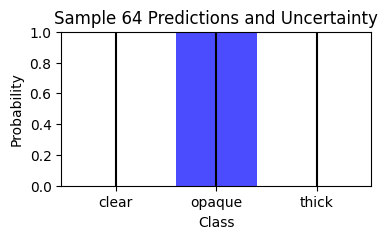

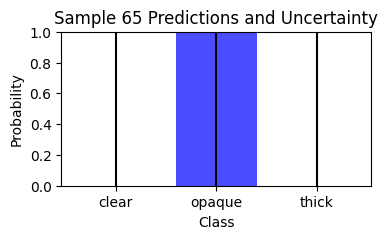

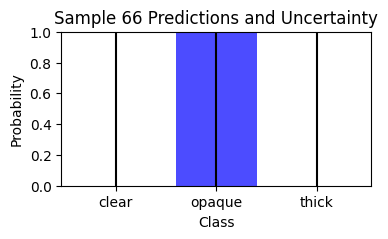

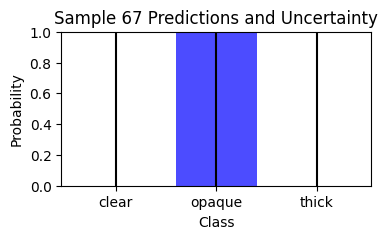

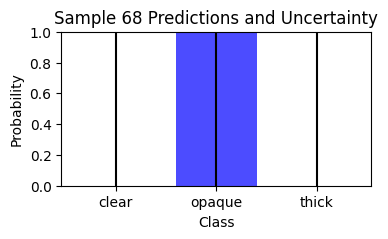

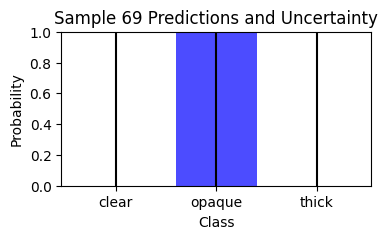

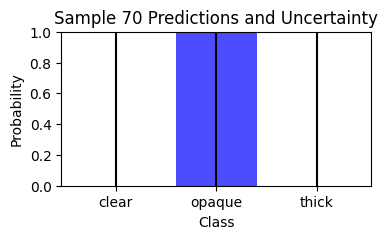

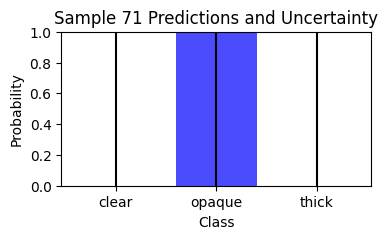

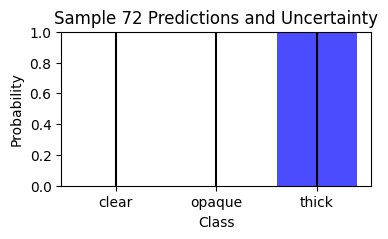

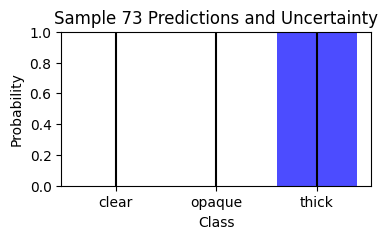

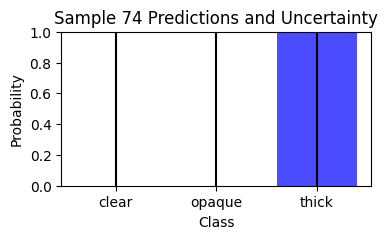

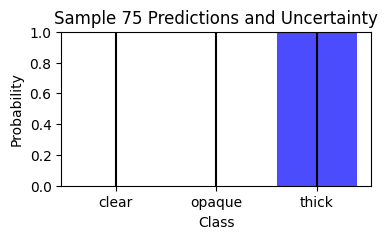

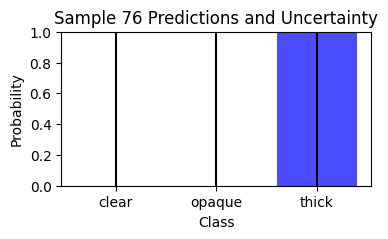

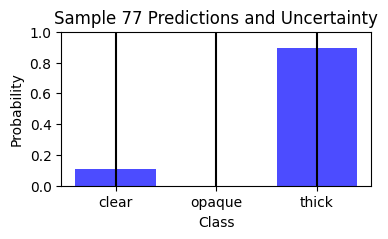

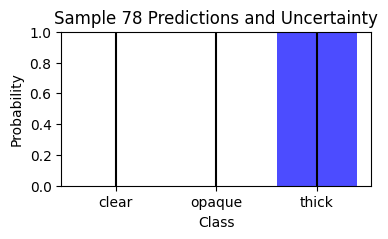

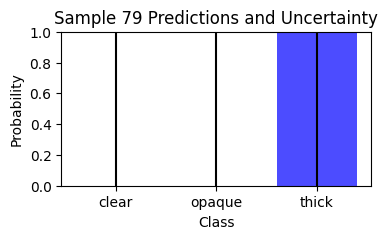

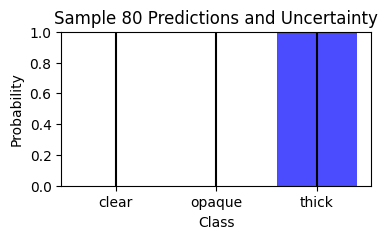

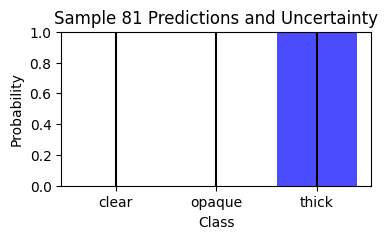

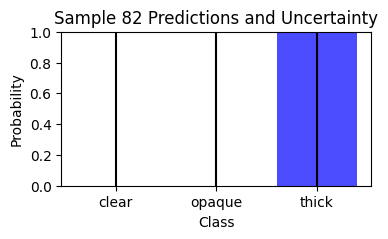

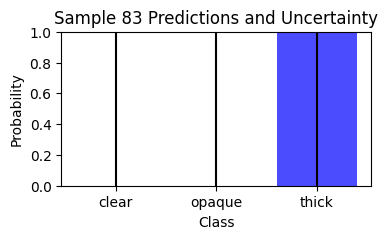

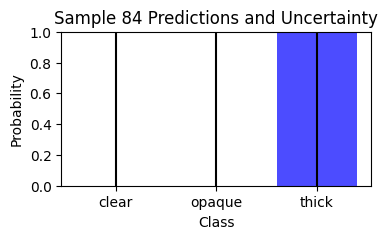

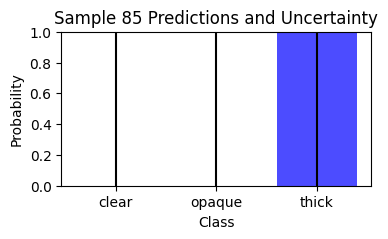

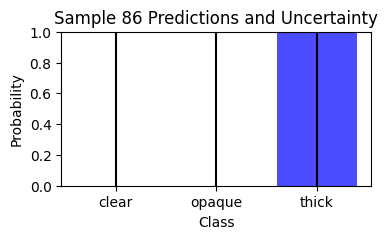

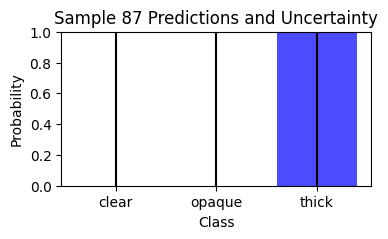

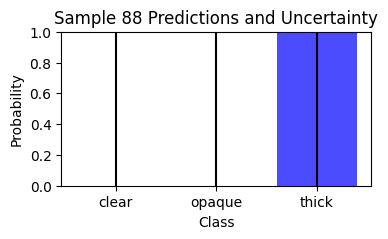

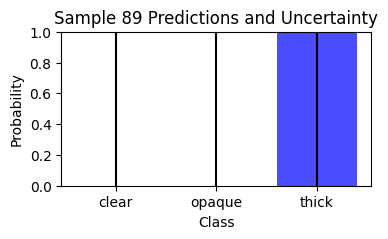

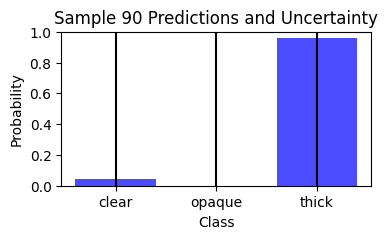

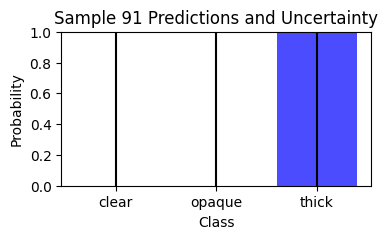

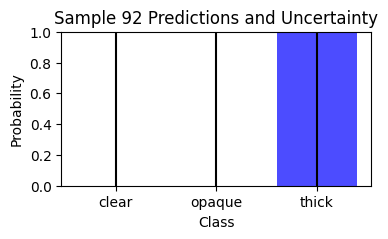

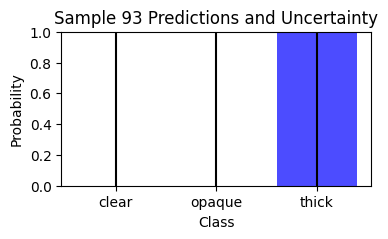

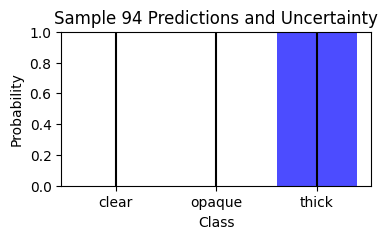

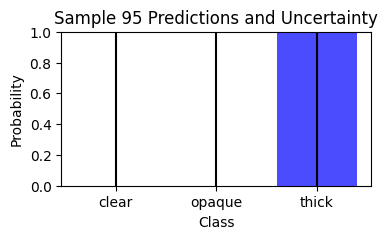

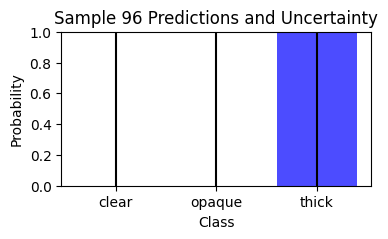

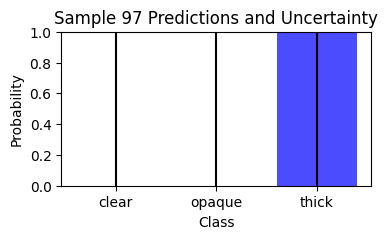

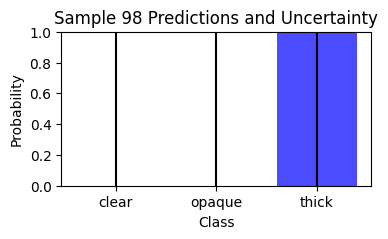

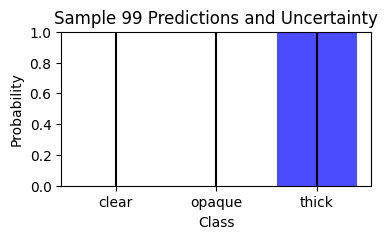

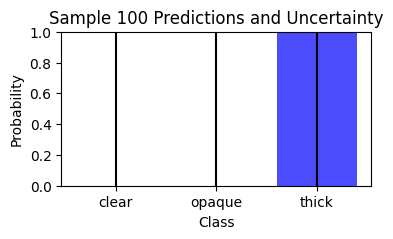

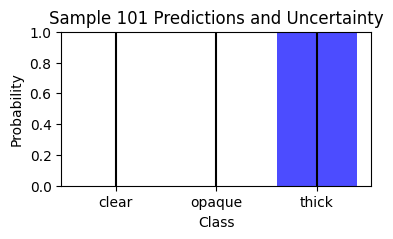

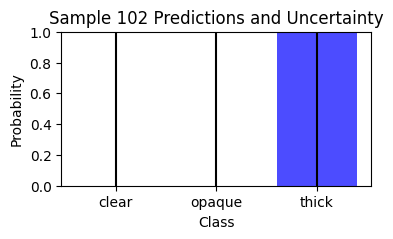

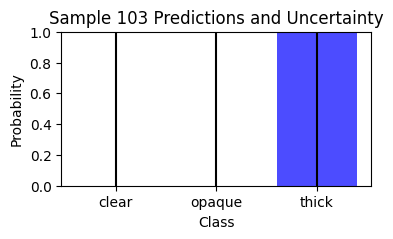

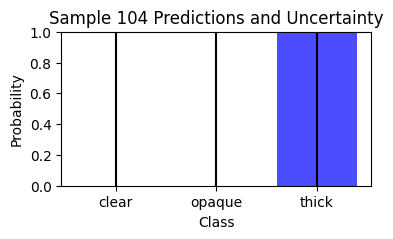

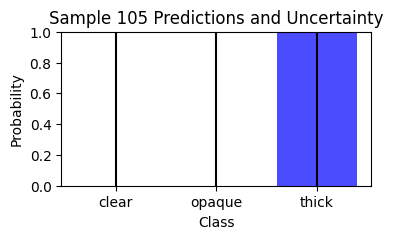

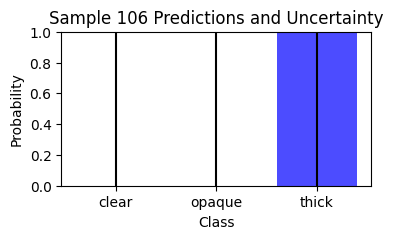

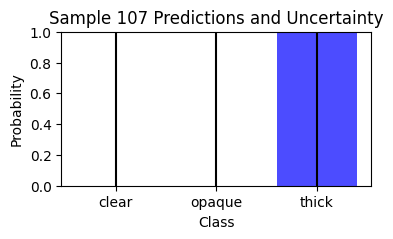

In [ ]:
for i in range(len(x_test)):
    plot_uncertainty(mean_predictions[i], prediction_variance[i], i)

###4. Visualization of class probabilities

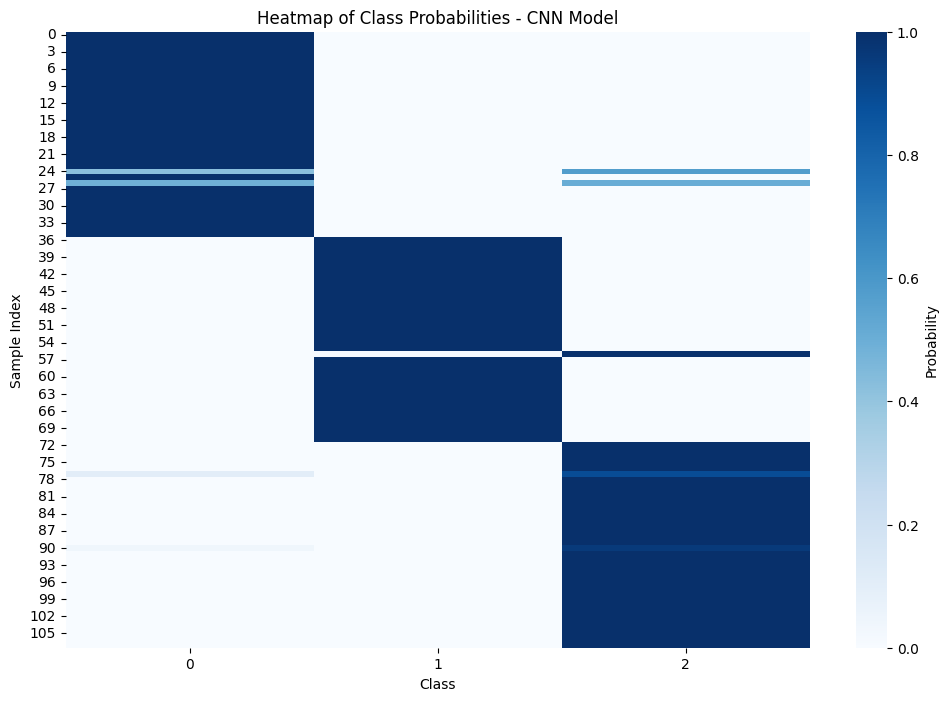

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(probabilities, cmap='Blues', cbar_kws={'label': 'Probability'}, annot=False, fmt=".2f")
plt.xlabel('Class')
plt.ylabel('Sample Index')
plt.title('Heatmap of Class Probabilities - CNN Model')
plt.show()

###5. Variance analysis

In [ ]:
predicted_probabilities = np.array([
    [9.99999999e-01, 1.03687911e-24, 5.15900164e-10],
    [1.00000000e+00, 4.33914184e-32, 7.12709197e-11],
    [9.99999998e-01, 5.64527007e-27, 1.99262948e-09],
    [9.99999983e-01, 1.77005875e-29, 1.71467193e-08],
    [1.00000000e+00, 2.39837321e-26, 6.46639511e-11],
    [1.00000000e+00, 2.21916761e-29, 2.06489902e-12],
    [9.99998344e-01, 7.92277647e-25, 1.65554722e-06],
    [9.99938329e-01, 1.13194805e-23, 6.16713152e-05],
    [1.00000000e+00, 6.06306656e-35, 4.37502568e-13],
    [9.99999201e-01, 1.77875043e-27, 7.99302664e-07],
    [9.99632707e-01, 2.83806993e-17, 3.67293475e-04],
    [1.00000000e+00, 2.51147152e-25, 3.58078801e-10],
    [1.00000000e+00, 1.82160188e-32, 7.58124342e-12],
    [9.99997966e-01, 2.31269916e-24, 2.03392203e-06],
    [9.99999621e-01, 4.69699653e-26, 3.78614584e-07],
    [1.00000000e+00, 2.79493069e-29, 1.62608192e-10],
    [9.99999936e-01, 2.99875004e-24, 6.36078642e-08],
    [9.99958800e-01, 6.02415529e-20, 4.12003700e-05],
    [9.99999998e-01, 5.94639987e-28, 1.69585496e-09],
    [9.99999940e-01, 4.51649940e-25, 6.03238179e-08],
    [9.99999999e-01, 1.48833218e-24, 6.28610303e-10],
    [9.99999797e-01, 1.31218970e-24, 2.02665489e-07],
    [1.00000000e+00, 1.69645276e-30, 9.33527992e-11],
    [9.99999843e-01, 7.90677996e-27, 1.56807014e-07],
    [4.21908311e-01, 3.79690270e-19, 5.78091689e-01],
    [9.98295618e-01, 2.20671086e-18, 1.70438229e-03],
    [4.90949574e-01, 6.16506621e-18, 5.09050426e-01],
    [9.99992838e-01, 4.34324139e-22, 7.16203684e-06],
    [9.99999893e-01, 8.67503530e-24, 1.06718421e-07],
    [1.00000000e+00, 7.00262232e-32, 1.06822544e-10],
    [1.00000000e+00, 5.91640620e-28, 2.34632396e-11],
    [9.99999999e-01, 1.94886624e-27, 5.03757845e-10],
    [9.99997329e-01, 1.68448712e-20, 2.67053337e-06],
    [1.00000000e+00, 2.85987872e-26, 2.33027615e-10],
    [9.99992886e-01, 4.72373529e-25, 7.11401914e-06],
    [9.99999687e-01, 5.03981590e-22, 3.12949950e-07],
    [4.48963994e-10, 9.99999986e-01, 1.33720673e-08],
    [2.25125577e-09, 9.98249868e-01, 1.75013013e-03],
    [1.11174023e-12, 9.99998439e-01, 1.56126311e-06],
    [3.69366493e-17, 9.99999999e-01, 5.21783581e-10],
    [2.06925944e-15, 9.99999971e-01, 2.92996130e-08],
    [9.76882882e-16, 9.99999986e-01, 1.43759594e-08],
    [1.69662489e-15, 9.99999733e-01, 2.66536438e-07],
    [4.93639282e-16, 9.99999798e-01, 2.01824061e-07],
    [1.19129366e-21, 1.00000000e+00, 2.31305669e-11],
    [8.42423980e-13, 9.99998012e-01, 1.98774349e-06],
    [6.83296948e-11, 9.99933139e-01, 6.68609637e-05],
    [5.36611343e-12, 9.99963095e-01, 3.69052797e-05],
    [1.00693191e-16, 9.99999985e-01, 1.54991865e-08],
    [5.10286041e-19, 1.00000000e+00, 3.28964302e-11],
    [1.45517593e-13, 9.99999888e-01, 1.11696162e-07],
    [4.18969991e-16, 9.99999953e-01, 4.72201756e-08],
    [1.42919349e-15, 9.99991916e-01, 8.08376868e-06],
    [5.42397600e-15, 9.99997501e-01, 2.49931624e-06],
    [1.01728011e-09, 9.99999145e-01, 8.54376285e-07],
    [8.09311377e-18, 9.99999705e-01, 2.95328723e-07],
    [8.51238299e-09, 3.91262826e-03, 9.96087363e-01],
    [1.76646688e-16, 1.00000000e+00, 1.00410022e-10],
    [4.96753408e-17, 9.99998444e-01, 1.55563508e-06],
    [3.15900914e-15, 9.99955772e-01, 4.42277588e-05],
    [6.31397551e-24, 1.00000000e+00, 9.73701383e-11],
    [7.43633459e-13, 9.99979226e-01, 2.07737501e-05],
    [9.75893339e-14, 9.99999849e-01, 1.51336812e-07],
    [1.60754593e-16, 9.99998169e-01, 1.83141957e-06],
    [1.10133875e-17, 9.99999988e-01, 1.24828221e-08],
    [2.82819242e-16, 9.99999229e-01, 7.71126479e-07],
    [1.63481803e-17, 9.99999930e-01, 6.95305287e-08],
    [8.24590156e-17, 9.99999855e-01, 1.45042878e-07],
    [1.69479759e-13, 9.99994389e-01, 5.61091505e-06],
    [1.64078567e-24, 1.00000000e+00, 2.81712584e-10],
    [9.07721498e-22, 1.00000000e+00, 4.23984160e-10],
    [1.82795465e-19, 9.99999879e-01, 1.20856833e-07],
    [1.48649214e-09, 2.37975199e-10, 9.99999998e-01],
    [7.43920037e-12, 9.46403791e-14, 1.00000000e+00],
    [7.50053593e-07, 5.17580751e-04, 9.99481669e-01],
    [2.41393671e-11, 4.65454126e-08, 9.99999953e-01],
    [6.49632511e-08, 1.04971775e-10, 9.99999935e-01],
    [1.08813535e-01, 2.16170488e-12, 8.91186465e-01],
    [1.45667560e-13, 6.86025011e-05, 9.99931397e-01],
    [3.66607630e-14, 4.21408194e-10, 1.00000000e+00],
    [7.39430251e-11, 6.33942070e-11, 1.00000000e+00],
    [3.43309981e-16, 8.84369689e-13, 1.00000000e+00],
    [8.82729551e-12, 3.21914041e-07, 9.99999678e-01],
    [9.36202411e-10, 9.78423149e-10, 9.99999998e-01],
    [3.47625941e-09, 1.30293693e-05, 9.99986967e-01],
    [7.68322975e-13, 1.92489606e-11, 1.00000000e+00],
    [6.29008171e-09, 1.42057212e-13, 9.99999994e-01],
    [5.01595751e-12, 2.27726627e-08, 9.99999977e-01],
    [5.87278668e-15, 1.10589646e-08, 9.99999989e-01],
    [3.90428447e-12, 5.62536676e-04, 9.99437463e-01],
    [4.27614898e-02, 4.40603846e-16, 9.57238510e-01],
    [2.58606685e-14, 7.12276459e-06, 9.99992877e-01],
    [8.17211450e-06, 1.45816666e-06, 9.99990370e-01],
    [6.39491179e-04, 4.05259281e-06, 9.99356456e-01],
    [1.70355051e-13, 2.73110895e-15, 1.00000000e+00],
    [3.07990493e-06, 9.55813689e-14, 9.99996920e-01],
    [1.39331196e-13, 1.75832396e-10, 1.00000000e+00],
    [7.44167240e-09, 3.70686521e-10, 9.99999992e-01],
    [1.60561490e-04, 8.31192708e-15, 9.99839439e-01],
    [3.76546087e-11, 6.42739925e-15, 1.00000000e+00],
    [6.00246159e-07, 2.43655397e-15, 9.99999400e-01],
    [4.17253579e-18, 4.77624950e-15, 1.00000000e+00],
    [1.02329413e-12, 3.42315343e-14, 1.00000000e+00],
    [2.59026678e-12, 1.29612829e-15, 1.00000000e+00],
    [4.30476784e-07, 1.71674739e-07, 9.99999398e-01],
    [3.63351404e-06, 1.16933077e-10, 9.99996366e-01],
    [2.16996624e-06, 2.12966676e-12, 9.99997830e-01],
    [5.55081962e-04, 3.01928828e-14, 9.99444918e-01],
])

In [ ]:
# Differences in variances for each sample
variance_differences = []
for i, variances in enumerate(prediction_variance):
    diff_0_1 = variances[1] - variances[0]  # Difference between Class 0 and Class 1
    diff_1_2 = variances[2] - variances[1]  # Difference between Class 1 and Class 2
    diff_0_2 = variances[2] - variances[0]  # Difference between Class 0 and Class 2

    variance_differences.append((diff_0_1, diff_1_2, diff_0_2))

    print(f"Sample {i}:")
    print(f"Variance differences - Class 0 to 1: {diff_0_1}, Class 1 to 2: {diff_1_2}, Class 0 to 2: {diff_0_2}")

Sample 0:
Variance differences - Class 0 to 1: 2.2295836300000005, Class 1 to 2: 11.13874449, Class 0 to 2: 13.368328120000001
Sample 1:
Variance differences - Class 0 to 1: -1.5499289800000042, Class 1 to 2: 7.210084409999993, Class 0 to 2: 5.660155429999989
Sample 2:
Variance differences - Class 0 to 1: 3.0755094499999984, Class 1 to 2: -0.6863249700000011, Class 0 to 2: 2.3891844799999973
Sample 3:
Variance differences - Class 0 to 1: 3.0011505599999992, Class 1 to 2: -1.917321549999997, Class 0 to 2: 1.0838290100000023
Sample 4:
Variance differences - Class 0 to 1: 19.43884612, Class 1 to 2: -14.84216254, Class 0 to 2: 4.5966835800000005
Sample 5:
Variance differences - Class 0 to 1: 18.216041590000003, Class 1 to 2: -17.108754060000003, Class 0 to 2: 1.1072875300000007
Sample 6:
Variance differences - Class 0 to 1: 7.961581019999997, Class 1 to 2: -20.433955960000006, Class 0 to 2: -12.472374940000009
Sample 7:
Variance differences - Class 0 to 1: 6.113748830000006, Class 1 to 2: 

###Section 2

###1. Calculation of Expected Calibration Error (ECE)

In [ ]:
def calculate_ece(y_true, y_prob, n_bins=10):
    bin_boundaries = np.linspace(0, 1, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]
    ece = 0.0

    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        in_bin = (y_prob > bin_lower) & (y_prob <= bin_upper)
        prop_in_bin = np.mean(in_bin)
        if prop_in_bin > 0:
            accuracy_in_bin = np.mean(y_true[in_bin])
            avg_confidence_in_bin = np.mean(y_prob[in_bin])
            ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin
    return ece

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

prediction_mean, _ = predict_with_uncertainty(cnn_model, x_test, n_iter=100)
prediction_probabilities = softmax(prediction_mean)

for class_index in range(NUM_CLASSES):
    positive_class_prob = prediction_probabilities[:, class_index]
    binary_y_true = (y_test == class_index).astype(int)
    ece = calculate_ece(binary_y_true, positive_class_prob)
    print(f"Expected Calibration Error (ECE) for Class {class_index}: {ece:.4f}")

Expected Calibration Error (ECE) for Class 0: 0.0144
Expected Calibration Error (ECE) for Class 1: 0.0092
Expected Calibration Error (ECE) for Class 2: 0.0223


###Isolation and detection of misclassified image with high certainty

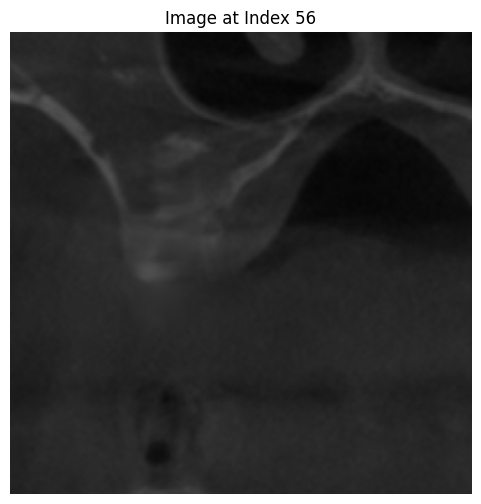

In [ ]:
image_index = 56
image = x_test[image_index]

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title(f'Image at Index {image_index}')
plt.axis('off')
plt.show()

###2. Plotting of calibration curves

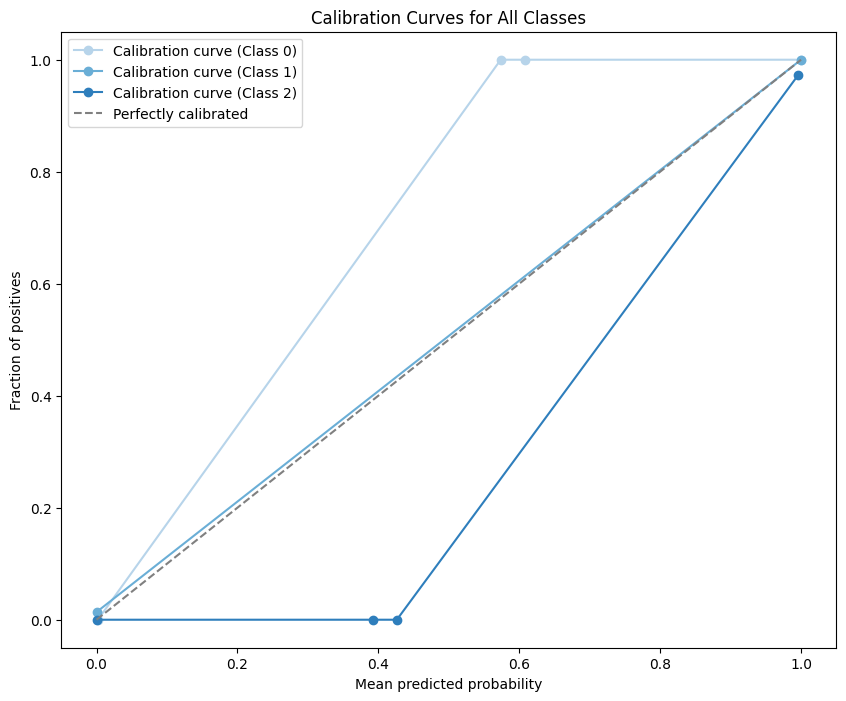

In [ ]:
def plot_calibration_curve(y_true, y_prob, class_index, color, n_bins=10):
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=n_bins, strategy='uniform')
    plt.plot(prob_pred, prob_true, marker='o', label=f'Calibration curve (Class {class_index})', color=color)
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

prediction_mean, _ = predict_with_uncertainty(cnn_model, x_test, n_iter=100)
prediction_probabilities = softmax(prediction_mean)
base_color = cm.Blues
shades = [base_color(i) for i in np.linspace(0.3, 0.7, NUM_CLASSES)]
plt.figure(figsize=(10, 8))

for class_index in range(NUM_CLASSES):
    positive_class_prob = prediction_probabilities[:, class_index]
    binary_y_true = (y_test == class_index).astype(int)
    plot_calibration_curve(binary_y_true, positive_class_prob, class_index=class_index, color=shades[class_index])
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated', color='gray')

plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curves for All Classes')
plt.legend()
plt.show()

###Section 3. Calculation of predictive entropy

In [ ]:
def calculate_predictive_entropy(predictive_mean):
    probabilities = np.clip(predictive_mean, 1e-10, 1.0)
    return -np.sum(probabilities * np.log(probabilities), axis=-1)

In [ ]:
prediction_mean, prediction_variance = predict_with_uncertainty(cnn_model, x_test, n_iter=100)
predictive_entropy = calculate_predictive_entropy(prediction_mean)

for i in range(len(x_test)):
    print(f"Sample {i}:")
    print(f"  Predicted Class: {class_labels[np.argmax(prediction_mean[i])]}")
    print(f"  Predictive Entropy: {predictive_entropy[i]:.4f}")
    print()

Sample 0:
  Predicted Class: clear
  Predictive Entropy: 0.0000

Sample 1:
  Predicted Class: clear
  Predictive Entropy: 0.0000

Sample 2:
  Predicted Class: clear
  Predictive Entropy: 0.0000

Sample 3:
  Predicted Class: clear
  Predictive Entropy: 0.0000

Sample 4:
  Predicted Class: clear
  Predictive Entropy: 0.0000

Sample 5:
  Predicted Class: clear
  Predictive Entropy: 0.0000

Sample 6:
  Predicted Class: clear
  Predictive Entropy: 0.0000

Sample 7:
  Predicted Class: clear
  Predictive Entropy: 0.0000

Sample 8:
  Predicted Class: clear
  Predictive Entropy: 0.0000

Sample 9:
  Predicted Class: clear
  Predictive Entropy: 0.0000

Sample 10:
  Predicted Class: clear
  Predictive Entropy: 0.0000

Sample 11:
  Predicted Class: clear
  Predictive Entropy: 0.0000

Sample 12:
  Predicted Class: clear
  Predictive Entropy: 0.0000

Sample 13:
  Predicted Class: clear
  Predictive Entropy: 0.0000

Sample 14:
  Predicted Class: clear
  Predictive Entropy: 0.0000

Sample 15:
  Predict

###Section 4 [Not implemented as CNN model displayed good calibration]

###Section 5

###1. Calculation of Total, Aleatoric and Epistemic Uncertainty

In [ ]:
def predict_with_uncertainty(model, x, n_iter=100):
    predictions = np.array([model(x, training=True) for _ in range(n_iter)])
    prediction_mean = np.mean(predictions, axis=0)
    prediction_variance = np.var(predictions, axis=0)
    return prediction_mean, predictions

predictions, posterior_samples = predict_with_uncertainty(cnn_model, x_test)
epsilon = 1e-10
posterior_samples = np.clip(posterior_samples, epsilon, 1.0)

total_uncertainties = []
aleatoric_uncertainties = []
epistemic_uncertainties = []
for i in range(x_test.shape[0]):
    average_prediction = np.mean(posterior_samples[:, i, :], axis=0)
    total_uncertainty = entropy(average_prediction, axis=-1)
    aleatoric_uncertainty = np.mean([entropy(sample[i, :], axis=-1) for sample in posterior_samples], axis=0)
    epistemic_uncertainty = total_uncertainty - aleatoric_uncertainty

    total_uncertainties.append(total_uncertainty)
    aleatoric_uncertainties.append(aleatoric_uncertainty)
    epistemic_uncertainties.append(epistemic_uncertainty)

for idx, (tu, au, eu) in enumerate(zip(total_uncertainties, aleatoric_uncertainties, epistemic_uncertainties)):
    print(f"Image {idx + 1}:")
    print(f"  Total Uncertainty (TU): {tu}")
    print(f"  Aleatoric Uncertainty (AU): {au}")
    print(f"  Epistemic Uncertainty (EU): {eu}")

Image 1:
  Total Uncertainty (TU): 0.6885221004486084
  Aleatoric Uncertainty (AU): 0.5839155316352844
  Epistemic Uncertainty (EU): 0.10460656881332397
Image 2:
  Total Uncertainty (TU): 0.6924843788146973
  Aleatoric Uncertainty (AU): 0.6446260213851929
  Epistemic Uncertainty (EU): 0.047858357429504395
Image 3:
  Total Uncertainty (TU): 0.6922457218170166
  Aleatoric Uncertainty (AU): 0.6429187655448914
  Epistemic Uncertainty (EU): 0.049326956272125244
Image 4:
  Total Uncertainty (TU): 0.6927355527877808
  Aleatoric Uncertainty (AU): 0.6580913662910461
  Epistemic Uncertainty (EU): 0.03464418649673462
Image 5:
  Total Uncertainty (TU): 0.6832237243652344
  Aleatoric Uncertainty (AU): 0.52989661693573
  Epistemic Uncertainty (EU): 0.1533271074295044
Image 6:
  Total Uncertainty (TU): 0.6836833953857422
  Aleatoric Uncertainty (AU): 0.5310292840003967
  Epistemic Uncertainty (EU): 0.15265411138534546
Image 7:
  Total Uncertainty (TU): 0.6928184032440186
  Aleatoric Uncertainty (AU):